In [1]:
# https://stackoverflow.com/questions/21971449/how-do-i-increase-the-cell-width-of-the-jupyter-ipython-notebook-in-my-browser
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

/tmp/ipykernel_1453373/327059659.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
%autoreload

In [4]:
import os
import sys
module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [5]:
import scripts
print(scripts.__path__)
import pathlib


from scripts.common.schemas import TypeCollectionCategory
from scripts.infer.structure import DatasetFolderStructure

dataset = DatasetFolderStructure(pathlib.Path(
    "/nfs/data/students/bsparks/mdti4py-dataset-pool/cdt4py"
))
assert dataset.dataset_root.is_dir(), f"{dataset.dataset_root} not a directory!"

print(dataset)

['/nfs/home/bsparks/mdti4py/scripts/scripts']


2023-09-28 13:25:47.961078: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-28 13:25:48.775152: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


CrossDomainTypes4Py @ /nfs/data/students/bsparks/mdti4py-dataset-pool/cdt4py


In [6]:
import importlib
import experiments.inferred

In [7]:
artifact_root = pathlib.Path("/nfs/home/bsparks/mdti4py/datasets")
assert artifact_root.is_dir(), f"Cannot find {artifact_root=}"

# Ground Truth

In [10]:
importlib.reload(experiments.inferred)
import pandas as pd
groundtruth = experiments.inferred.load_groundtruths(artifact_root, dataset).replace("<MISSING>", pd.NA)

/nfs/home/bsparks/mdti4py/datasets/CrossDomainTypes4Py/chrisc36__umpy-allennlp/extended_ground_truth.csv: 100%|█████████████████████████████████████████████████████████████████████████████████████████| 1550/1550 [00:20<00:00, 73.90it/s]
/nfs/home/bsparks/mdti4py/datasets/CrossDomainTypes4Py/chrisc36__umpy-allennlp/context.csv: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 1550/1550 [00:09<00:00, 171.50it/s]


# Type4Py

In [11]:
from experiments import pipeline, inferred

In [12]:
type4py_inferred = inferred.load_entire_inferred(
    artifact_root, dataset, tool_name="type4pyN1", task="all"
)
type4py_adjusted = pipeline.factory(
    tool="type4pyN1", 
    groundtruth=groundtruth, 
    inferred=type4py_inferred, 
    form="adjusted"
)
type4py_base = pipeline.factory(
    tool="type4pyN1",
    groundtruth=groundtruth,
    inferred=type4py_inferred,
    form="base"
)

/nfs/home/bsparks/mdti4py/datasets/CrossDomainTypes4Py/chrisc36__umpy-allennlp/type4pyN1/all/inferred.csv: 100%|███████████████████████████████████████████████████████████████████████████████████████| 1550/1550 [00:10<00:00, 149.85it/s]


Loaded 1539 inference artifacts
Initial prediction size: (1171294, 8)
Deriving limited form


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1171294/1171294 [00:10<00:00, 113361.45it/s]


Deriving adjusted form from limited form


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1171294/1171294 [00:09<00:00, 126166.22it/s]


Size after joining predictions to groundtruth: (1054110, 12)


/nfs/home/bsparks/mdti4py/scripts/experiments/inferred.py:269: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned[clean_annos] = cleaned[clean_annos].fillna("<MISSING>")


Reduced to evaluatable: (228284, 12)
Deriving limited form


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1171294/1171294 [00:09<00:00, 124161.51it/s]


Deriving adjusted form from limited form


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1171294/1171294 [00:08<00:00, 134591.76it/s]


Deriving base form from adjusted form


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1171294/1171294 [00:09<00:00, 122411.82it/s]


(1054110, 12)
Reduced to evaluatable: (228284, 12)


/nfs/home/bsparks/mdti4py/scripts/experiments/inferred.py:269: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned[clean_annos] = cleaned[clean_annos].fillna("<MISSING>")


# Typilus

In [13]:
typilus_inferred = inferred.load_entire_inferred(
    artifact_root, dataset, tool_name="typilusN1", task="all"
)
typilus_adjusted = pipeline.factory(
    tool="typilusN1", 
    groundtruth=groundtruth, 
    inferred=typilus_inferred, 
    form="adjusted"
)
typilus_base = pipeline.factory(
    tool="typilusN1",
    groundtruth=groundtruth,
    inferred=typilus_inferred,
    form="base"
)

/nfs/home/bsparks/mdti4py/datasets/CrossDomainTypes4Py/chrisc36__umpy-allennlp/typilusN1/all/inferred.csv: 100%|███████████████████████████████████████████████████████████████████████████████████████| 1550/1550 [00:10<00:00, 142.21it/s]


Loaded 1542 inference artifacts
Initial prediction size: (1171258, 8)
Deriving limited form


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1171258/1171258 [00:10<00:00, 115789.57it/s]


Deriving adjusted form from limited form


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1171258/1171258 [00:11<00:00, 104123.05it/s]


Size after joining predictions to groundtruth: (1012573, 12)


/nfs/home/bsparks/mdti4py/scripts/experiments/inferred.py:269: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned[clean_annos] = cleaned[clean_annos].fillna("<MISSING>")


Reduced to evaluatable: (222302, 12)
Deriving limited form


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1171258/1171258 [00:09<00:00, 119560.57it/s]


Deriving adjusted form from limited form


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1171258/1171258 [00:09<00:00, 118464.45it/s]


Deriving base form from adjusted form


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1171258/1171258 [00:09<00:00, 119275.59it/s]


(1012573, 12)
Reduced to evaluatable: (222302, 12)


/nfs/home/bsparks/mdti4py/scripts/experiments/inferred.py:269: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned[clean_annos] = cleaned[clean_annos].fillna("<MISSING>")


# TypeT5

In [14]:
typet5_inferred = inferred.load_entire_inferred(
    artifact_root, dataset, tool_name="TypeT5TopN1", task="all"
)
typet5_adjusted = pipeline.factory(
    tool="TypeT5TopN1",
    groundtruth=groundtruth,
    inferred=typet5_inferred,
    form="adjusted"
)
typet5_base = pipeline.factory(
    tool="TypeT5TopN1",
    groundtruth=groundtruth,
    inferred=typet5_inferred,
    form="base"
)

/nfs/home/bsparks/mdti4py/datasets/CrossDomainTypes4Py/chrisc36__umpy-allennlp/TypeT5TopN1/all/inferred.csv: 100%|█████████████████████████████████████████████████████████████████████████████████████| 1550/1550 [00:09<00:00, 156.20it/s]


Loaded 1483 inference artifacts
Initial prediction size: (1151363, 8)
Deriving limited form


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1151363/1151363 [00:05<00:00, 216122.08it/s]


Deriving adjusted form from limited form


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1151363/1151363 [00:05<00:00, 214469.43it/s]


Size after joining predictions to groundtruth: (584320, 12)
Reduced to evaluatable: (206348, 12)


/nfs/home/bsparks/mdti4py/scripts/experiments/inferred.py:269: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned[clean_annos] = cleaned[clean_annos].fillna("<MISSING>")


Deriving limited form


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1151363/1151363 [00:05<00:00, 216108.39it/s]


Deriving adjusted form from limited form


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1151363/1151363 [00:05<00:00, 203091.14it/s]


Deriving base form from adjusted form


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1151363/1151363 [00:05<00:00, 218504.98it/s]


(584320, 12)
Reduced to evaluatable: (206348, 12)


/nfs/home/bsparks/mdti4py/scripts/experiments/inferred.py:269: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned[clean_annos] = cleaned[clean_annos].fillna("<MISSING>")


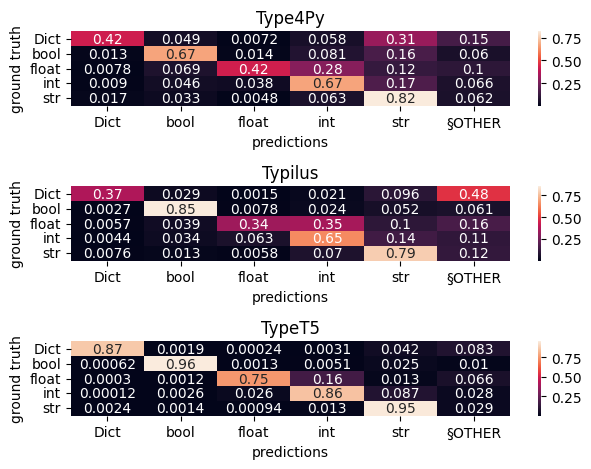

<Figure size 500x1000 with 0 Axes>

<Figure size 500x1000 with 0 Axes>

<Figure size 500x1000 with 0 Axes>

In [17]:
import experiments.predictions
import matplotlib.pyplot as plt
importlib.reload(experiments.predictions)
thres_figs, (ax1, ax2, ax3) = plt.subplots(nrows=3)

ax1.set_title('Type4Py')
type4py_base_ubiq = experiments.predictions.ubiquitous_types(type4py_base.replace("<MISSING>", pd.NA).dropna())
experiments.predictions.co_occurrences(
    type4py_base_ubiq,
    truth="gt_anno",
    pred="anno",
    threshold=0.00,
    figsize=(5, 10),
    ax=ax1
)

ax2.set_title('Typilus')
typilus_base_ubiq = experiments.predictions.ubiquitous_types(typilus_base.replace("<MISSING>", pd.NA).dropna())
experiments.predictions.co_occurrences(
    typilus_base_ubiq, 
    truth="gt_anno", 
    pred="anno", 
    threshold=0.00, 
    figsize=(5, 10), 
    ax=ax2
)

ax3.set_title('TypeT5')
typet5_base_ubiq = experiments.predictions.ubiquitous_types(typet5_base.replace("<MISSING>", pd.NA).dropna())
experiments.predictions.co_occurrences(
    typet5_base_ubiq, 
    truth="gt_anno",
    pred="anno", 
    threshold=0.00,
    figsize=(5, 10),
    ax=ax3
)

thres_figs.tight_layout()
thres_figs.show()

In [ ]:
ax1.show()

# Overlap: Capture per symbol diversity

In [ ]:
!pip install matplotlib-venn
from matplotlib_venn import venn3

In [ ]:
ignore = ["gt_anno", "topn", "method"]

common_predictions = type4py_adjusted.drop(columns=ignore).merge(
    typilus_adjusted.drop(columns=ignore), 
    how="outer", 
    on=["repository", "category", "file", "qname", "qname_ssa"], 
    suffixes=("_type4py", "_typilus")
).merge(
    typet5_adjusted.drop(columns=ignore).rename(columns={"anno": "anno_typet5"}),
    how="outer", 
    on=["repository", "category", "file", "qname", "qname_ssa"]
)

common_predictions = pd.merge(
    left=common_predictions,
    right=groundtruth,
    how="left",
    on=["repository", "category", "file", "qname", "qname_ssa"],
).replace("<MISSING>", pd.NA).dropna(subset=["adjusted_anno", "anno_type4py", "anno_typilus", "anno_typet5"], how="all", axis=0)
    
#display(common_predictions["adjusted_anno"].value_counts())
common_predictions[["anno_type4py", "anno_typilus", "anno_typet5"]] = common_predictions[["anno_type4py", "anno_typilus", "anno_typet5"]]#.fillna("<MISSING>")
common_predictions[["adjusted_anno", "anno_type4py", "anno_typilus", "anno_typet5"]]

In [ ]:
!pip install upsetplot
import upsetplot

In [ ]:
aligned = pd.DataFrame()
for relevant in ["adjusted_anno", "anno_type4py", "anno_typilus", "anno_typet5"]:
    aligned[relevant] = common_predictions.index.astype("string") + common_predictions[relevant].fillna(pd.NA)

aligned[["adjusted_anno", "anno_type4py", "anno_typilus", "anno_typet5"]]

In [ ]:
venn3(
    (set(aligned["anno_type4py"].tolist()), set(aligned["anno_typilus"].tolist()), set(aligned["anno_typet5"].tolist())),
    set_labels=('Type4Py', 'Typilus', 'TypeT5'),
)

In [ ]:
relevant = aligned[["adjusted_anno", "anno_type4py", "anno_typilus", "anno_typet5"]]

gt_anno, type4py, typilus, typet5 = relevant.T.to_dict("records")

contents = {
    #"ground_truth": set(gt_anno.values()),
    "Typilus": set(typilus.values()).difference({None, pd.NA}),
    "Type4Py": set(type4py.values()).difference({None, pd.NA}),
    "TypeT5": set(typet5.values()).difference({None, pd.NA}),
}

import upsetplot
predictions_by_model = upsetplot.from_contents(contents)
predictions_by_model

upsetplot.UpSet(predictions_by_model, show_counts=True, subset_size='count')

In [ ]:
relevant = aligned[["adjusted_anno", "anno_type4py", "anno_typilus", "anno_typet5"]]
gt_anno, type4py, typilus, typet5 = relevant.T.to_dict("records")

contents = {
    "GT": set(gt_anno.values()).difference({None, pd.NA}),
    "Typilus": set(typilus.values()).difference({None, pd.NA}),
    "Type4Py": set(type4py.values()).difference({None, pd.NA}),
    "TypeT5": set(typet5.values()).difference({None, pd.NA}),
}

import upsetplot
predictions_by_model = upsetplot.from_contents(contents)
predictions_by_model

upsetplot.UpSet(predictions_by_model, show_counts=True, subset_size='count')

In [ ]:
# Investigate types not predicted by any model:
missed_entirely = common_predictions[
    (common_predictions["anno_typet5"] != common_predictions["adjusted_anno"]) &
    (common_predictions["anno_type4py"] != common_predictions["adjusted_anno"]) &
    (common_predictions["anno_typilus"] != common_predictions["adjusted_anno"])
]
missed_entirely[["repository", "file", "qname_ssa", "adjusted_anno","anno_typet5", "anno_type4py", "anno_typilus"]]

In [ ]:
missed_entirely["adjusted_anno"].value_counts()

In [ ]:
for anno in ["type4py", "typilus", "typet5"]:
    print(missed_entirely[["adjusted_anno", f"anno_{anno}"]].value_counts())